# Tutorial 2 - ADCs and Random Numbers
2nd April 2019

In this tutorial, we are going to cover two unrelated concepts that are too small to warrant their own tutorial; Analogue-to-Digital Converters (ADCs) and Random Number Generators.

## Analogue to Digital Converters
We have seen these before in some of your labs! They take a continuous analogue signal and convert it into a discretised, digital signal. We will be looking at them from a software side - there is, of course, some level of ADC needed anytime you read a real signal into a digital display device (eg Multimeter).


In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt

In [2]:
def find_nearest(array, value):
    # A helper function that returns the closest value in 'array' to the input 'value'
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# Making our adc function! This is not the most efficient way of doing it, but I hope it's easier to understand.
def adc1(signal, num_bits, input_range):
    # A function to digitise an analogue signal
        # Signal is a list or 1D array of all the values
        # num_bitsis the number of bits (1s or zeros) we will have in our ADC
        # input_range is the range of inputs we will allow, as a tuple (min, max)
    
    # Extract the min and max values from the input range
    sig_min, sig_max = input_range
    # Generate the discrete levels that our ADC is going to map the real signal to
    disc_levels = np.linspace(sig_min, sig_max, 2**num_bits)
    
    # For each element in the signal, match it to the closest discrete level:
    out = list() # Create an empty output array
    for i in signal:
        out.append(find_nearest(disc_levels,i))
        
    return out
    


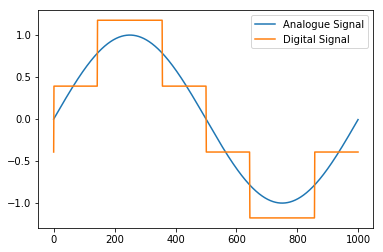

In [8]:
# We have made a BASIC digitiser - check it out above.
# Let's test it out using a sinusoid
samples = 1000
timebase = np.arange(0, 2*np.pi, 2*np.pi/samples)
signal = np.sin(timebase)
plt.plot(signal)

# The parameters of our ADC
bit_depth = 8 #How many bits are we using to encode our signal values?
input_range = (-100,100) #What range of input will we expect?
plt.plot(adc1(signal, bit_depth, input_range))
plt.legend(["Analogue Signal", "Digital Signal"])


**Homework:**
1. Play around with the bit depth and the range - try poorly optimised values and see how that affects the digitised signal.
2. Take a look at [Michael's Notes](https://github.com/phys3112/intro/blob/master/mcba3-analog-to-digital-conversion.ipynb) and modify the ADC to add noise to the signal - then also write something to average these noisy values into a 'smoother' digital output!

## Random Number Generators
This time, you're going to have to write your own random number generator!

Typically your RNG (random number generator) will take the previous random number as an input.


In [26]:
def crappy_random(current_value, seed, maximum):
    # A crappy 'random number' generator that performs arbitrary maths on the most recent sample
    # I keep changing this around but they all suck (for good reason)
    return int(np.mod(((23)**current_value + 2), maximum))

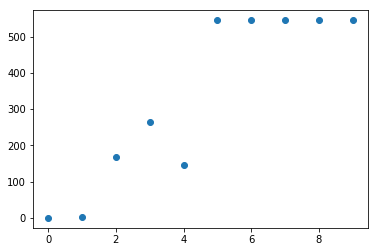

In [27]:
seed = time.time()
maximum = 1000
starter_value = 0

#Let's make some junk random values!
num_vals = 10
vals = list()
curr_val = 0
for i in range(num_vals):
    vals.append(curr_val)
    curr_val = crappy_random(curr_val, seed, maximum)
plt.plot(vals,'o')
# Observe how quickly it 'stabilises' into a few certain values!!
# Run it again and again for different seed times and see what occurs - this is a TERRIBLE RNG!

**Homework**
Write your own implementation of ANY random number generator. You may wish to take a look at [Michael's Notes](https://github.com/phys3112/intro/blob/master/mcba6-random-numbers.ipynb). The challenge here is to see how random your random number generator is; save the output to a file and attempt to compress it! If you can't reduce the file size, then you're doing a good job!